In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install tensorflow

In [ ]:
pip install --upgrade tensorflow

In [ ]:
from tensorflow.keras.preprocessing import image

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import numpy as np

In [ ]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from random import shuffle

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
import random

In [ ]:
import os
import PIL

In [ ]:
import matplotlib

In [ ]:
import glob
from skimage import io

In [ ]:
!pip3 install tf-nightly

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.17.0-dev20240526'

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dense
from tensorflow.keras.metrics import categorical_crossentropy

In [ ]:
from skimage import data, img_as_float

In [ ]:
from skimage import data, img_as_float
from skimage import exposure

In [ ]:
from skimage import exposure

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
import itertools

In [ ]:
from PIL import Image

In [ ]:
batch_size = 16
img_height = 120
img_width  = 120

In [ ]:
data_dir="/content/drive/MyDrive/brain_dataset"

In [ ]:
mode=1

In [ ]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'Nearest'
)

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.3,
  subset="training",
  color_mode=['grayscale', 'rgb'][mode],
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  )

class_names = train_ds.class_names

train_ds = train_ds.prefetch(buffer_size=tf.data.AUTOTUNE)

print(class_names)



Found 3294 files belonging to 4 classes.
Using 2306 files for training.
['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']
Found 3294 files belonging to 4 classes.
Using 2306 files for training.
['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.3,
  subset="validation",
  color_mode=['grayscale', 'rgb'][mode],
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size)

class_names = val_ds.class_names

val_ds = val_ds.prefetch(buffer_size=tf.data.AUTOTUNE)

print(class_names)

Found 3294 files belonging to 4 classes.
Using 988 files for validation.
['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']


In [ ]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(16, 120, 120, 3)
(16,)


In [ ]:
for images_batch, labelss_batch in val_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(16, 120, 120, 3)
(16,)


In [ ]:
from sklearn import preprocessing

In [ ]:
le = preprocessing.LabelEncoder()
le.fit(labels_batch)

LabelEncoder()

In [ ]:
train_labels_encoded = le.transform(labels_batch)

In [ ]:
le.fit(labelss_batch)
test_labels_encoded = le.transform(labelss_batch)

In [ ]:
IMG_SHAPE=(img_height, img_width, 3)

IMG_SHAPE

(120, 120, 3)

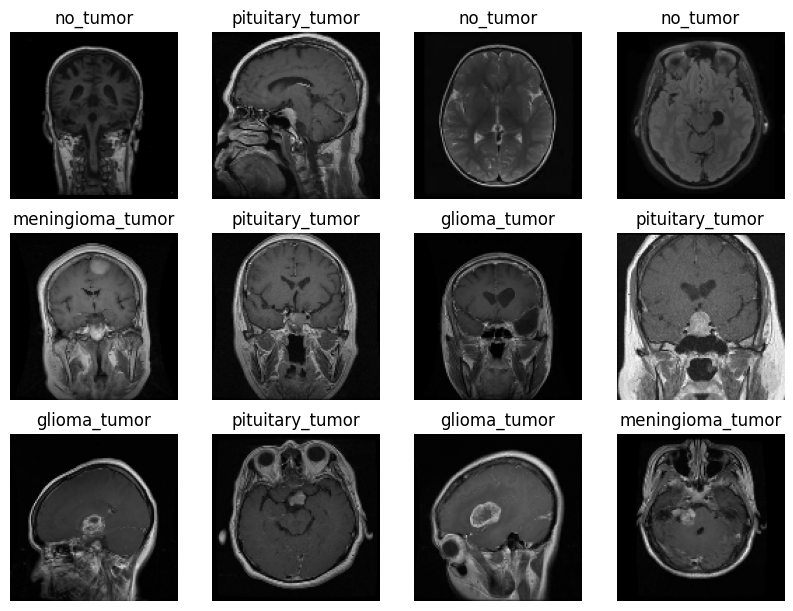

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(12):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

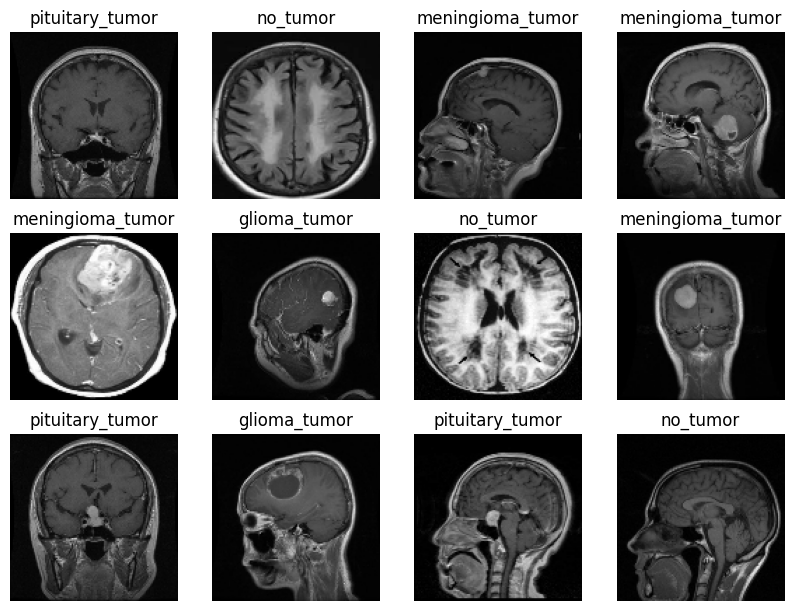

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in val_ds.take(1):
  for i in range(12):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [ ]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
images_batch, labelss_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 248.59212


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

# Processing(MobileNET)

In [ ]:
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

<ipython-input-44-08f37ad4fdf6>:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
base_model.trainable = False

In [ ]:
base_model.summary()

Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 120, 120, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 60, 60, 32)     │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 60, 60, 32)     │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 60, 60, 32)     │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 60, 60, 32)     │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 60, 60, 32)     │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 60, 60, 32)     │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 60, 60, 16)     │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 60, 60, 16)     │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 60, 60, 96)     │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 60, 60, 96)     │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 60, 60, 96)     │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 61, 61, 96)     │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 30, 30, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise_BN 

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
from tensorflow.keras import layers

model1 = tf.keras.models.Sequential([

  tf.keras.layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

  # MobileNetV2
  base_model,

  # Flatten the results to feed into a DNN
  tf.keras.layers.Flatten(),

  # 40000 neuron hidden layer
  tf.keras.layers.Dense(10000, activation='relu'),
  tf.keras.layers.Dropout(0.2),

  # 40000 neuron hidden layer
  tf.keras.layers.Dense(2058, activation='relu'),
  tf.keras.layers.Dropout(0.2),

  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dropout(0.2),

  # 3 output neuron for each type of mask in sequence ['bad_mask', 'mask', 'no_mask']
  tf.keras.layers.Dense(4, activation='softmax')
])

early_stopping = EarlyStopping(monitor='val_loss', patience=3)

model1.summary()

model1.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:18: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)              │ (None, 120, 120, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mobilenetv2_1.00_224 (Functional)    │ (None, 4, 4, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 20480)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10000)               │     204,810,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 10000)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2058)                │      20,582,058 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 2058)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │       1,054,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │           2,052 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 228,706,302 (872.45 MB)

 Trainable params: 226,448,318 (863.83 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
x_for_RF = model1.predict(image_batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
RF_model = RandomForestClassifier(n_estimators = 500)

In [ ]:
RF_model.fit(x_for_RF,train_labels_encoded)

RandomForestClassifier(n_estimators=500)

In [ ]:
x_test_feature = model1.predict(images_batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


In [ ]:
prediction_RF = RF_model.predict(x_test_feature)

In [ ]:
prediction_RF = le.inverse_transform(prediction_RF)

In [ ]:
from sklearn import metrics

In [ ]:
print("Acc = ", metrics.accuracy_score(labelss_batch,prediction_RF))

Acc =  0.3125


In [ ]:
model1.compile(optimizer='SGD',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
epochs = 10
history = model1.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 18s 123ms/step - accuracy: 0.9769 - loss: 0.0654 - val_accuracy: 0.8978 - val_loss: 0.3880
Epoch 2/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 12s 64ms/step - accuracy: 0.9809 - loss: 0.0483 - val_accuracy: 0.8856 - val_loss: 0.4777
Epoch 3/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 10s 69ms/step - accuracy: 0.9899 - loss: 0.0294 - val_accuracy: 0.8887 - val_loss: 0.4550
Epoch 4/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 9s 64ms/step - accuracy: 0.9920 - loss: 0.0250 - val_accuracy: 0.8998 - val_loss: 0.4132
Epoch 5/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 9s 57ms/step - accuracy: 0.9965 - loss: 0.0128 - val_accuracy: 0.9099 - val_loss: 0.3829
Epoch 6/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 11s 65ms/step - accuracy: 0.9990 - loss: 0.0081 - val_accuracy: 0.9089 - val_loss: 0.3975
Epoch 7/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 11s 68ms/step - accuracy: 0.9984 - loss: 0.0069 - val_accuracy: 0.9059 - val_loss: 0.4256
Epoch 8/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 9s 62ms/step - accuracy: 0.9980 - loss: 0.0088 - va

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


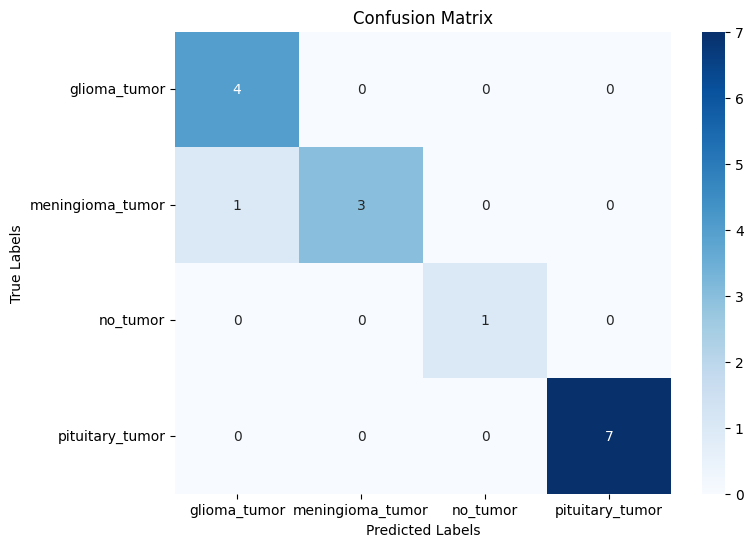

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Evaluate the model
val_images, val_labels = next(iter(val_ds))
val_pred = model1.predict(val_images)
val_pred_labels = np.argmax(val_pred, axis=1)

# Convert val_labels to a NumPy array
val_true_labels = val_labels.numpy().astype(int)

# Confusion matrix
conf_mat = confusion_matrix(val_true_labels, val_pred_labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

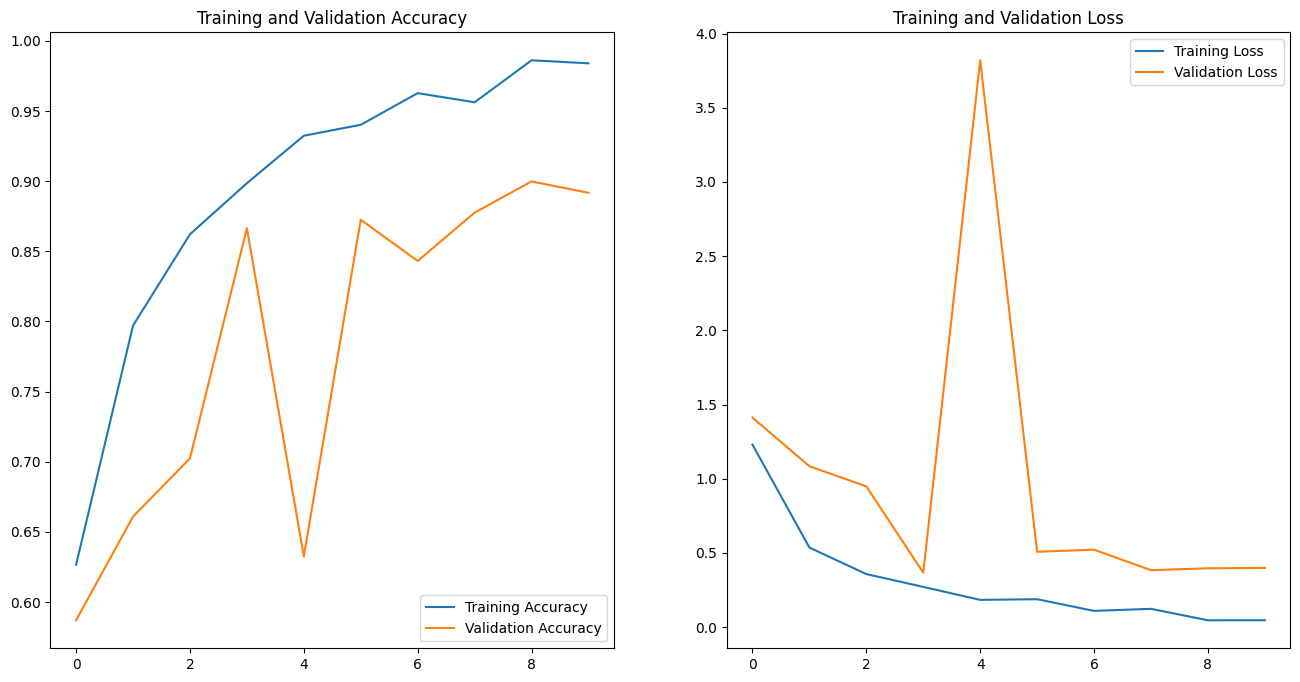

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
model1.predict(images_batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


array([[0.2543795 , 0.30023974, 0.23685728, 0.2085235 ],
       [0.25576022, 0.29844952, 0.23960838, 0.20618188],
       [0.25442022, 0.29997146, 0.24121077, 0.20439754],
       [0.2570707 , 0.29724604, 0.24173057, 0.20395267],
       [0.2538524 , 0.29446912, 0.24981605, 0.20186242],
       [0.25325194, 0.29469442, 0.24197136, 0.21008231],
       [0.25653377, 0.29932198, 0.24037053, 0.20377374],
       [0.25487363, 0.29492763, 0.24335802, 0.2068407 ],
       [0.25603047, 0.29691935, 0.24306855, 0.20398165],
       [0.25756606, 0.29861355, 0.23833378, 0.20548667],
       [0.25603172, 0.2996426 , 0.23857956, 0.20574616],
       [0.2557104 , 0.298456  , 0.24007714, 0.20575641],
       [0.2558729 , 0.29736573, 0.24202135, 0.20474003],
       [0.25126   , 0.30305022, 0.23753673, 0.20815305],
       [0.25612363, 0.29906836, 0.23927015, 0.20553787],
       [0.25728294, 0.29744905, 0.23958142, 0.20568657]], dtype=float32)

In [ ]:
def predictImage1(filename):
    img1 = image.load_img(filename,target_size=(img_height, img_width))

    plt.imshow(img1)

    #img1 = tf.image.rgb_to_grayscale(img1)

    Y = image.img_to_array(img1)

    X = np.expand_dims(Y,axis=0)

    val = model1.predict(X)

    val = list(val[0])

    print(val)

    class_of_object = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

    temp = max(val)

    max_index = val.index(temp)

    print(f"Class={class_of_object[max_index]}, Probability={temp}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
[0.011614909, 0.9844641, 0.0020500096, 0.0018708793]
Class=meningioma_tumor, Probability=0.9844641089439392


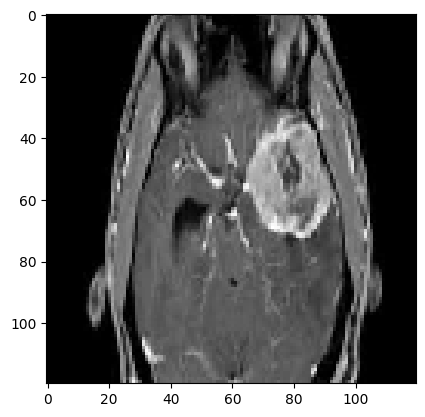

In [ ]:
filename = "/content/drive/MyDrive/test_img/image1.jpg"

predictImage1(filename)

# Saving the Model

In [ ]:
model1.save('/content/drive/My Drive/saved_models/brain_tumour_detection.keras')